# Maternal Health Data Analysis

### Context

The health of women throughout pregnancy, childbirth, and the postpartum period is referred to as maternal health. Despite significant advancement over the past 20 years, 295,000 women died during or after pregnancy and childbirth in 2017. This number is unacceptably high. In addition to indirect factors including anaemia, and malaria, the most frequent direct causes of maternal injury and death are excessive blood loss, infection, and high blood pressure. Most maternal deaths are preventable with timely management by skilled professionals working together across different disciplines.  

### Objective
As a data scientist working alongside clinicians, this project aims to analyze maternal health data, and identify evidence based actions with an aim to improve health outcomes.  

### Data 

**Age** - Age of the patient in years  
**SystolicBP** - Systolic Blood Pressure reading in mmHg (upper blood pressure value) - **Response Variable**  
**DiastolicBP** - Diastolic Blood Pressure reading in mmHg (lower blood pressure value)  
**BS** - Blood Sugar level in mmol/L  
**BodyTemp** - Body Temperature reading  
**HeartRate** - Heart Rate reading in beats per minute  
**RiskLevel** - Risk Level rating (high, low and mid)

## Import relevant libraries

First, we import relevant libraries to aid our analysis

In [1]:
# importing relevant libraries

import pandas as pd # for data processing
import numpy as np # for numerical computations

# for visualizations
import seaborn as sns 
import matplotlib.pyplot as plt

# To split the data into train and test sets
from sklearn.model_selection import train_test_split

# For data normalisation
from sklearn.preprocessing import StandardScaler

# For building linear models
from sklearn.linear_model import LinearRegression

# For evaluating the performance of the model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

## Read in the data
Next, we read in the data to be used for the analysis.  
I would also be making a copy of the data and using the copy for the analysis. This is to preserve the integrity of the original data.

In [2]:
# reading in the datda
data = pd.read_csv('mhs.csv') # reading in the data

df = data.copy() # making a copy of the data

df.head() # displaying the first 5 rows of the data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


- At first glance, the data seems okay. There are no unnecessary columns in the dataset
- There are 6 columns with numerical data type and 1 column with object data type.

## Perform Exploratory Data Analysis

Exploratory Data Analysis helps us find patterns and get insights from the data.   

Since the end goal of the exploration is to build a linear regression model, it is important to perform univariate and bivariate analysis on the data.

This would be useful in selecting the independent variables that best fits the assumptions of linear regression so that we can use them to build the model.

### Dimension of the data
Checking the dimension of the data

In [3]:
# Checking the dimension of the data
df.shape

(1014, 7)

- There are 1,014 rows and 7 columns in the data

### Null values
Checking for null values in the data

In [4]:
# checking for null values
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

- There are no null values in any of the columns

### Empty values
The data has a column with object data type. It is important to check for empty strings in the data as these will not appear as null values

In [5]:
# function to check for empty values
def check_empty_values(df):
    """Function to check for empty values in the input dataframe
    Args:
        df: the dataframe
    """
    for i in df.columns: # looping through each column in the dataset 
        for row, value in enumerate(df[i]): # looping through each row in the columns
            if value == ' ': # looking for empty strings
                print(f'Empty value found on row: {row} in column: {i}') # prints this if an empty value is found
            else:
                pass
    print("No empty values found") # prints this if empty values are not found

In [6]:
# calling the function on the dataframe (df)
check_empty_values(df)

No empty values found


- No empty values were found in the dataset

### Duplicated values
We need to check the data for duplicated values.

In [7]:
# checking for duplicated values
df.duplicated().sum()

562

There are 562 duplicated values. However, I would not be removing the duplicated values for the following reasons:
- There is no unique identifier such as Patient ID or Patient Name to suggest that these values are duplicates
- Different patients can have similar medical results

### Summary information of the dataset

In [8]:
# checking the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


- There are **7 columns** in the dataframe
- There are **1014 rows** and **no null values** in the dataframe
- The `Age`, `SystolicBP`, `DiastolicBP` and `HeartRate` columns are integers
- The `BS` and `BodyTemp` columns are floats
- The `RiskLevel` column is an object

### Statistical overview of the numerical data in the dataset
I would be creating a subset of the data that includes only the numerical variables to get the statistical overview

In [9]:
# separating the numerical variables from the dataset
num_df = df.select_dtypes(include='number') # creating a dataframe of only numerical variables
num_df.head(5) # displaying the first 5 rows of the dataframe

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [10]:
# getting the statistical overview of the dataframe

num_df.describe().T # the .T attribute transposes the position of the rows and columns to aid readability

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


- The mean `Age is 29`. Most women in the data are between `19 - 39 years`
- The mean `Systolic BP is 113`. Most women in the data have a `Systolic BP of between 100 - 120`
- The mean `Diastolic BP is 76`. Most women in the data have a `Diastolic BP of between 65 - 90`
- The mean `Blood Sugar level is 8.7`. Most women in the data have a `Blood Sugar level of between 6.9 to 8.0`
- The mean `Body Temperature is 98.6`. Most women in the data have a `Body Temperature of 98.0`
- The mean `Heart Rate is 74`. Most women in the data have a `Heart Rate of between 70 - 80`. 

#### Observations from statistical overview

There are some anomalies in the data:
1. The minimum `HeartRate is 7`  
This is not possible as humans have an `average heartrate of between 60 and 100`. Although individual heart rates can vary greatly based on factors such as age, fitness level and overall health.  


2. The minimum and maximum age is `10 and 70 respectively`  
Pregnancy at the age of 10 and 70, although highly unlikely, is still possible. 

These values could be data input errors, as in the case of the heart rate, or could be outright exceptions, as in the case of the ages 10 and 70.  

#### Treating data anomalies

In [11]:
# subsetting the data for rows where Age is 10
df[df['Age']==10]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
19,10,70,50,6.9,98.0,70,low risk
250,10,85,65,6.9,98.0,70,low risk
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk


- There are 4 rows where age is 10 years. 

In [12]:
# subsetting the data for rows where Age is 70
df[df['Age']==70]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
338,70,85,60,6.9,102.0,70,low risk


- There is only one row where age is 70

In [13]:
# subsetting the data for rows where HeartRate is 7
df[df['HeartRate']==7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


- There are 2 rows where HeartRate is 7

#### Dropping HeartRate below 26

I am using 26 as a benchmark as it has been shown that the lowest ever recorded heart rate was found in an athlete at 26 beats per minute. 

In [14]:
# dropping rows that have a heart rate less than 26
df = df.drop(index=df[df['HeartRate'] < 26].index)

Checking if the row has been successfully dropped

In [15]:
# quality check
df[df['HeartRate'] < 26]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


### Univariate Data Analysis
I will further analyse the data by looking at the distribution of each variable including the target variable (SystolicBP).

In [16]:
# plotting histograms of all the numerical variables

def plot_histograms(data):
    """Function to plot histograms
    Args:
        data: the selected data for the plots
    """
    plt.figure(figsize = (14, 8)) # setting the plot size

    for i, variable in enumerate(data): # looping through the variables in the numerical dataframe
        plt.subplot(2, 3, i+1) # setting the layout rows and columns
        ax = sns.histplot(x = data[variable], data = data) # plotting the histograms
        plt.title(f'{variable} Distribution') # setting the title of the histograms
        plt.tight_layout() # creating adequate spacing between the plots

In [17]:
# separating the numerical variables from the dataset using the updated cleaned data
num_df2 = df.select_dtypes(include='number') # creating a dataframe of only numerical variables

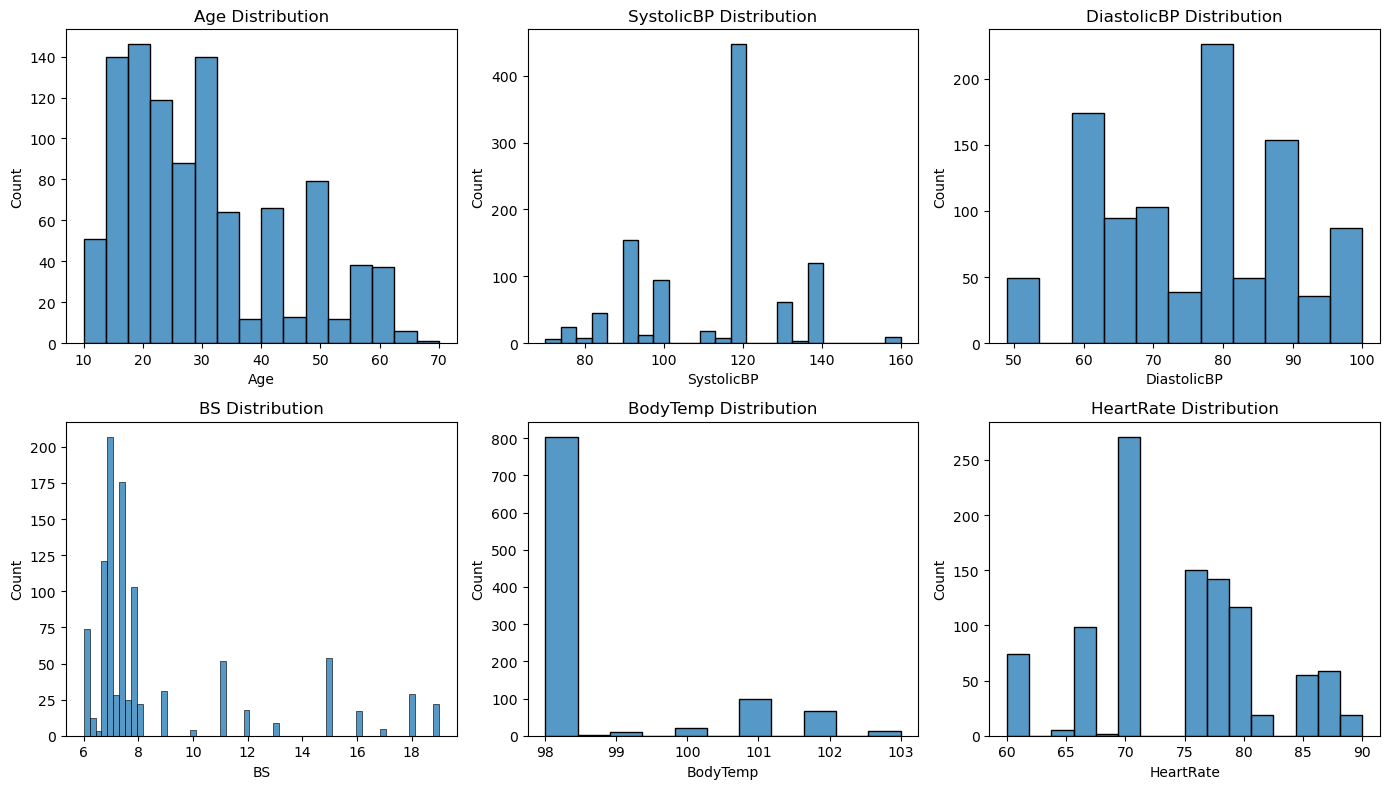

In [18]:
# applying the function on the updated numerical dataset (num_df2)
plot_histograms(num_df2)

- The Age distribution is right-skewed. Most women are younger than 40 years old  
- The SystolicBP distribution is slightly normally distributed. Systolic BP is mostly between 100 - 120 
- The DiastolicBP distribution is slightly normally distributed. Diastolic BP is mostly between 65 - 90  
- The BS distribution is right-skewed. Blood Sugar is mostly between 6.0 - 8.0  
- The BodyTemp distribution is right-skewed. Body Temperature is mostly 98.0  
- The Heart Rate distribution is slightly normally distributed. HeartRate is mostly between 70 - 80

#### Risk Level

In [19]:
# plotting the RiskLevel distribution

def plot_annotated_countplot(data, var):
    """Function to plot an annotated countplot
    Args:
        data: the selected data for the plot
        var: required variable
    """
    
    # setting the plot size
    plt.figure(figsize = (8, 6)) 

    # plotting the countplot
    plot = sns.countplot(data=data, x = var) 

    # specifying the data length
    data_length = len(data[var])

    # creating percentage labels for the bars
    for p in plot.patches: # iterating over each bar in the countplot
        percentage = '{:.2f}%'.format(100 * p.get_height() / data_length) # computing the percentages

        # computes the location the percentage labels will be placed
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()

        # adding the percentage labels
        plot.annotate(percentage, (x, y), ha='center', size=12, xytext=(0, 5), textcoords='offset points') 

    plt.title(f'{var} Distribution') # setting the plot title
    plt.show() # displaying the plot

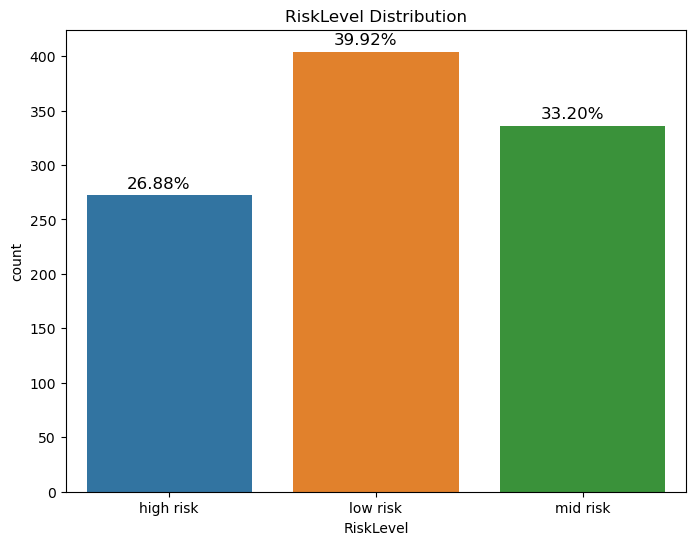

In [20]:
# applying the function on the required variable
plot_annotated_countplot(df, 'RiskLevel')

- `26.88%` of the women have a high risk level rating
- `39.92%` of the women have a low risk level rating
- `33.20%` of the women have a mid risk level rating

### Bivariate Data Analysis

This is necessary to help identify the relationship between the independent variables and the target variable.  

It is also necessary to identify multicolinearity between independent variables.

#### RiskLevel against HeartRate

In [21]:
def bivariate_plot(data, var_x, var_y, plot_type = sns.scatterplot, color = None, figsize = (8, 6)):
    """Function to plot a bivariate plot
    Args:
        data: the selected data for the plot
        var_x: variable for the x_axis
        var_y: variable for the y_axis
        plot_type: the type of bivariate plot
        color: the colour of the plot
        figsize: the size of the figure
    """
    
    plt.figure(figsize=figsize) # setting the figure size
    plot_type(x=var_x, y=var_y, data=data, color=color) # specifying the plot type, variables and data
    plt.title(f'{var_y} against {var_x}') # setting the plot title
    plt.show() # displaying the plot

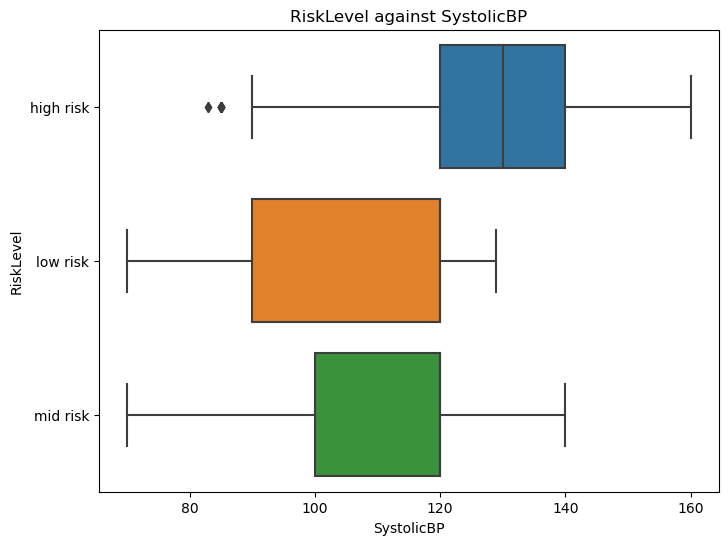

In [22]:
# applying the function on the required variables
bivariate_plot(df, 'SystolicBP', 'RiskLevel', sns.boxplot)

From the boxplots above, we can observe the following:

- Women at high risk have their systolic BP mostly between 120 - 140, with majority of women having a SystolicBP of 140
- Women at mid risk have their systolic BP mostly between 100 - 120, with majority of women having a SystolicBP of 120
- Women at low risk have their systolic BP mostly between 90 - 120, with majority of women having a SystolicBP of 120

### Using the get_dummies( ) method to convert Risk Level values to numerical values

A model cannot be built using non-numerical variables. I would be using the get_dummies method to encode the categorical variables.

In [23]:
# encoding the categorical variables
df = pd.get_dummies(df)

In [24]:
# quality check
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel_high risk', 'RiskLevel_low risk', 'RiskLevel_mid risk'],
      dtype='object')

#### Heatmap

The heatmap shows the correlation between variables in the dataset. This helps us identify which variables have a linear relationship with the target variable and should be used to build the model.

In [25]:
# plotting a heatmap using all the variables in the dataset

def plot_heatmap(data, fig_title):
    """Function to plot a heatmap
    Args:
        data: the selected data for the plot
        fig_title: the title for the heatmap
    """
    plt.figure(figsize = (8, 6)) # setting the figure size
    sns.heatmap(data.corr(), vmax=1, vmin=-1, annot=True) # plotting the heatmap
    plt.title(fig_title) # setting the plot title
    plt.show() # displaying the plot

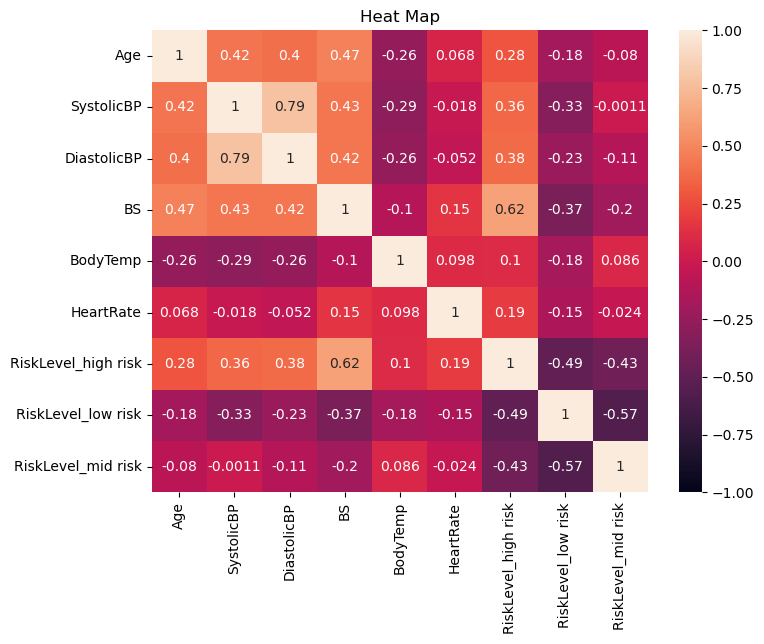

In [26]:
# applying the function on the required data
plot_heatmap(df, 'Heat Map')

The following can be observed from the heatmap above:
- DiastolicBP has a high positive correlation with the target variable (SystolicBP). This means that as DiastolicBP increases, SystolicBP also increases
- Age, Blood Sugar have a moderate positive correlation with SystolicBP
- Body Temp and RiskLevel_low risk both have a low negative correlation with SystolicBP. 
- RiskLevel_high risk has a low positive correlation with SystolicBP. 
- HeartRate and RiskLevel_mid risk both have very minimal negative correlation with SystolicBP

There is no milticolinearity among independent variables as none of them have a very strong correlation with each other. However, it is observed that Blood Sugar and RiskLevel_high risk have a moderate positive correlation. This means that as Blood Sugar increases, the risk of a pregnant woman developing high blood pressure also increases.

# Task 1

**Build and fit a linear model, assuming that the response variable is Systolic BP, and the exploratory variable(s) of your choice.**

### Feature Selection 

I will be selecting the best features to build the model. 

From the heatmap, `HeartRate` and `RiskLevel_mid risk` were the only variables that had no correlation with the target variable. If I were to select features based on the information gotten from the heatmap, I would be dropping these variables (HeartRate and RiskLevel_mid risk) before building the model.

#### K-best Algorithm

The K-best algorithm is another feature selection method.
I would be using this to corroborate the information I got from the heatmap before selecting the features.

In [27]:
# importing the KBest algorithm and the f_regression scoring function
from sklearn.feature_selection import SelectKBest, f_regression

# creating a function to compute the K_best scores and plot them
def plot_kbest_scores(data, target_variable):
    """Function to compute and plot the k_best features
    Args:
        data: the selected data for the computations and plot
        target_variable: the target variable in the data 
    """
    
    # Splitting the data into training and testing
    X = data.drop(target_variable, axis=1) # independent variables
    y = data[target_variable] # target variable
    
    # Rank the features using SelectKBest and f_regression
    kbest_feat = SelectKBest(f_regression, k='all') # declaring an instance of the kbest algorithm
    X_kbest = kbest_feat.fit_transform(X, y) # fitting the algorithm to the target and independent variables
    kbest_scores = X.columns[kbest_feat.get_support()] # computing the kbest scores
    
    # Plotting a graph of the scores against the features
    plt.figure(figsize=(8,6)) # setting the figure size
    plt.bar(range(len(kbest_scores)), kbest_feat.scores_[kbest_feat.get_support()]) # plotting the bar chart
    plt.xticks(range(len(kbest_scores)), kbest_scores, rotation='vertical') # rotating the x_label to 90 degrees
    plt.xlabel('Features') # setting the xlabel
    plt.ylabel('Score') # setting the ylabel
    plt.title('Best Features') # setting the title
    plt.show() # displaying the plot

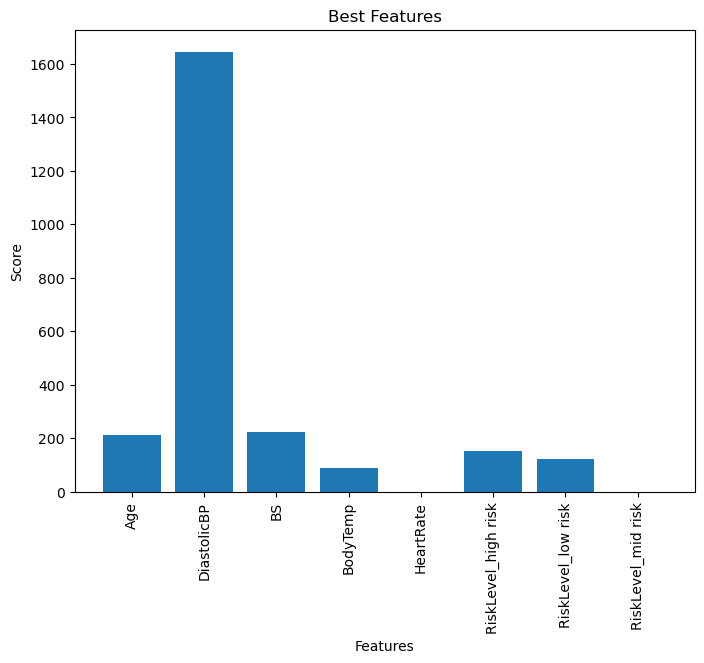

In [28]:
# applying the function on the required data
plot_kbest_scores(df, 'SystolicBP')

From the bar chart above, `HeartRate` and `RiskLevel_mid risk` have the lowest scores. This corroborates what was computed on the heatmap.

### Building the model

#### Selecting the training features and the target

In [29]:
# we drop the target variable, and the variables that have no correlation with the target
X = df.drop(['SystolicBP', 'HeartRate', 'RiskLevel_mid risk'], axis = 1) # training data
y = df['SystolicBP'] # target data

In [30]:
# quality check
X.columns

Index(['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'RiskLevel_high risk',
       'RiskLevel_low risk'],
      dtype='object')

#### Splitting the data 

The data would be split into train and test only because it does not have a lot of rows. Splitting the data is important to prevent information leakage. We do not want to expose the model to all the data.  

This is important to help validate the performance of the model and how well it would generalise to new data similar to the one used to train it.

The test size would be 20% of the data.

In [31]:
# splitting the data into train and test sets. We will use 80% to train and 20% to test
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

#### Normalizing the data

This involves scaling the data to ensure values fall within the same range. I would be using the StandardScaler algorithm to achieve this.

In [32]:
scaler = StandardScaler() # declaring an instance of the scaler

x_train_sc = scaler.fit_transform(x_train) # scaling the train data

x_test_sc = scaler.transform(x_test) # scaling the test data

#### Fitting the model

In [33]:
lr = LinearRegression() # declaring an instance of the model

In [34]:
# function to train a model
def train_model(model, X, y):
    """Function to train a model
    Args: 
        model: an instance of the linear regression model
        X: the scaled training data
        y: the target data
    Returns:
        trained model: the trained model
    """
    trained_model = model.fit(X, y) # train the model
    return trained_model # returning the trained model

In [35]:
# training the model
lr_model = train_model(lr, x_train_sc, y_train)

#### Checking the coefficients of the model

These are the values the model attaches to each of the independent variables which it learns.  

These values correspond to each independent variable and they are the contributions of each variable to the target variable.  

In [36]:
# computing the coefficients
model_coefficients = lr_model.coef_ # calling the coefficient attribute
model_coefficients

array([ 1.5728046 , 12.36417245,  0.60995975, -1.78219036, -0.47082618,
       -3.09633505])

In [37]:
# pairing each coefficient with its corresponding variable to create a dictionary of the values

# looping through the train variables and the coefficients using a dictionary comprehension
coeff_dict = {f"{i}":j for i,j in zip(X.columns, model_coefficients)}

coeff_df = pd.DataFrame([coeff_dict]) # putting the values in a dataframe
coeff_df

,Age,DiastolicBP,BS,BodyTemp,RiskLevel_high risk,RiskLevel_low risk
0,1.572805,12.364172,0.60996,-1.78219,-0.470826,-3.096335


The above can be interpreted as follows:

- Using Blood Sugar as an example, we can say a one unit increase in Blood Sugar, assuming all other variables remain constant, the value of the SystolicBP would increase by 0.60996
- For the Body Temperature which is a negative coefficient, we could say that a one unit increase in the Body Temperature, assuming all other variables remain constant, would result in the Systolic BP decreasing by 1.78219

#### Computing the performance of the model 

In [38]:
# function to compute adjusted R-squared

def compute_adjusted_r2(ind_variables, target_vals, pred_vals):
    """ Function to compute the adjusted r2 (adjusted coefficient of determination)
    Args:
        ind_variables: independent variables in the dataset
        target_vals: the target values
        pred_vals: the predicted values
    Returns:
        the value for the adjusted r2
    """
    r2 = r2_score(target_vals, pred_vals) # computing the r2 (coefficient of determination)
    rows_num = ind_variables.shape[0] # getting the number of rows in the data
    col_num = ind_variables.shape[1] # getting the number of columns in the data
    return 1 - ((1 - r2) * (rows_num - 1) / (rows_num - col_num - 1)) # computing the adjusted r2

In [39]:
# function to compute Mean Absolute Percentage Error

def compute_mape(target_vals, pred_vals):
    """ Function to compute the mean absolute percentage error
    Args:
        target_vals: the target values
        pred_vals: the predicted values 
    Returns:
        the value for the mean absolute percentage error
    """
    return np.mean(np.abs(target_vals - pred_vals) / target_vals) * 100 # computing the mape

In [40]:
# function to compute all the metrics of the model

def compute_model_metrics(trained_model, ind_variables, target_vals):
    """Function to compute the metrics of the model
    Args:
        trained_model: the trained linear regression model
        ind_variables: independent variables in the dataset, the training or test data
        target_vals: the target values
    Returns:
        df_metrics: a dataframe of all the computed metrics
    """
    
    pred = trained_model.predict(ind_variables) # making a prediction with the model
    
    mse = mean_squared_error(target_vals, pred) # computing the Mean Squared Error
    rmse = np.sqrt(mean_squared_error(target_vals, pred))  # computing the Root Mean Squared Error
    mae = mean_absolute_error(target_vals, pred)  # computing the Mean Absolute Error
    mape = compute_mape(target_vals, pred)  # computing the Mean Absolute Percentage Error
    r2 = r2_score(target_vals, pred)  # computing the r2 (coefficient of determination)
    adjusted_r2 = compute_adjusted_r2(ind_variables, target_vals, pred)  # computing the adjusted R-squared
    
    metrics_list = [mse, rmse, mae, mape, r2, adjusted_r2] # putting all the metrics in a list
    
    # creating a list for the metric titles
    metrics_titles = ['Mean_Squared_Error', 'Root_Mean_Squared_Error', 'Mean_Absolute_Error', 
                     'Mean_Absolute_Percentage_Error', 'R_squared', 'Adjusted_R_squared']
    
    # creating a dictionary to pair the metrics with their titles
    metrics_dict = {title: metric for title,metric in zip(metrics_titles, metrics_list)}
    
    df_metrics = pd.DataFrame([metrics_dict]) # putting the values in a dataframe

    return df_metrics # returns a dataframe of the metrics for easy viewing and interpretation

#### Computing the model performance on the train and test data

In [41]:
# model performance on training data
train_metrics_df = compute_model_metrics(lr_model, x_train_sc, y_train) # computing the metrics on the training data
train_metrics_df

,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error,Mean_Absolute_Percentage_Error,R_squared,Adjusted_R_squared
0,113.842286,10.66969,8.514957,7.85008,0.655945,0.653371


In [42]:
# model performance on test data
test_metrics_df = compute_model_metrics(lr_model, x_test_sc, y_test) # computing the metrics on the test data
test_metrics_df

,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error,Mean_Absolute_Percentage_Error,R_squared,Adjusted_R_squared
0,114.763793,10.712786,8.732645,7.957039,0.690586,0.681114


- From the metrics above, we can say that the model generalises well as the performance metrics computed for the training data are in close range to that computed for the test data.

### Forward Sequential Feature Selection

This feature selection technique would help discover the important independent variables that actually contribute to the model.

In [43]:
# splitting the data into training and testing
X2 = df.drop('SystolicBP', axis=1) # using all the independent variables
y2 = df['SystolicBP'] # target variable

In [44]:
# splitting the data into train and test sets. We will use 80% to train and 20% to test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0, test_size=0.2)

In [45]:
scaler2 = StandardScaler() # declaring an instance of the scaler

x_train_sc2 = scaler2.fit_transform(x_train2) # scaling the train data

x_test_sc2 = scaler2.transform(x_test2) # scaling the test data

In [46]:
# installing mlxtend
!pip install mlxtend

In [47]:
# importing the necessary modules
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import make_scorer

# specifying Mean Absolute Error as the scoring metric
# the greater_is_better parameter is set to False because we want a lower score for this error
scorer = make_scorer(mean_absolute_error, greater_is_better=False) 

# creating an instance of the SequentialFeatureSelector class and setting the appropriate hyperparameters
# x_train.shape[1] selects all the specified training features 
# we are performing the forward sequential feature selection
forward_sfs = SequentialFeatureSelector(estimator=lr, k_features=x_train2.shape[1], scoring=scorer, 
                                        n_jobs=-1, verbose=2)

# fitting the model
forward_sfs.fit(x_train_sc2, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    6.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.0s finished

[2023-05-12 09:32:08] Features: 1/8 -- score: -8.998459656432729[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-05-12 09:32:08] Features: 2/8 -- score: -8.638104405615142[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-05-12 09:32:08] Features: 3/8 -- score: -8.440574014475091[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(8, 8),
                          n_jobs=-1,
                          scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                          verbose=2)

#### Visualising the performance of the model

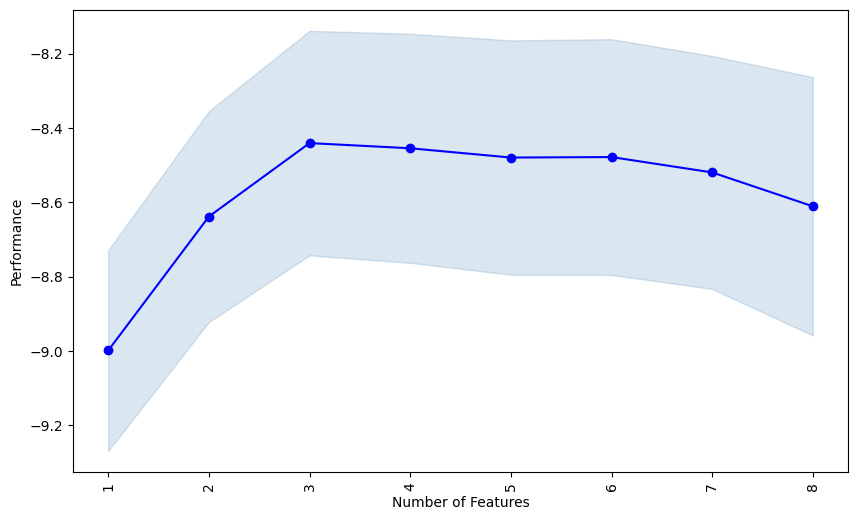

In [48]:
# importing the necessary module
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs

# plotting the standard error of the model
std_err_plt = plt_sfs(forward_sfs.get_metric_dict(), kind="std_err", figsize = (10, 6)) 
plt.xticks(rotation = 90) # rotating the x labels 90 degrees
plt.show() # displaying the plot

The y-axis shows the Mean Absolute Error values which reduces up the y-axis hence the negative values.  
From the graph above, the Mean Absolute Error of the model stopped declining after the third feature.

#### Using the 3 features to rebuild the model

In [49]:
# creating an instance of the SequentialFeatureSelector class
# setting the k_features hyperparameter to 3
forward_sfs2 = SequentialFeatureSelector(estimator=lr, k_features=3, n_jobs=-1, verbose=2)

# fitting the model
forward_sfs2.fit(x_train_sc2, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-05-12 09:32:08] Features: 1/3 -- score: 0.6077141725954647[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-05-12 09:32:08] Features: 2/3 -- score: 0.6302823583574065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-05-12 09:32:08] Features: 3/3 -- score: 0.6424171905528797

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(3, 3),
                          n_jobs=-1, scoring='r2', verbose=2)

#### Important Features

In [50]:
# using the k_feature_indx_ attribute to get the index of the important features
forward_sfs2.k_feature_idx_

(1, 3, 6)

The important features are at the column indexes above in the dataframe.  

In the code below, I would be using these indexes to get the corresponding columns.

In [51]:
# converting the tupule of the important features' indexes to a list
imp_feats = list(forward_sfs2.k_feature_idx_)

# using the index of the important features to get the columns from the training data
x_train2.columns[imp_feats]

Index(['DiastolicBP', 'BodyTemp', 'RiskLevel_low risk'], dtype='object')

- The important variables are `DiastolicBP`, `BodyTemp`, and `RiskLevel_low risk`

In [52]:
# getting the data of the important features from the training and test data
x_train_imp = x_train2[x_train2.columns[imp_feats]] # getting the training data
x_test_imp = x_test2[x_train2.columns[imp_feats]] # getting the test data

# normalising the data
scaler_imp = StandardScaler() # creating an instance of the StandardScaler class

# scaling the training and test data
x_train_imp_sc = scaler_imp.fit_transform(x_train_imp) # scaling the training data
x_test_imp_sc = scaler_imp.transform(x_test_imp) # scaling the test data

#### Rebuilding the Linear Regression Model

In [53]:
# creating an instance of the model
lr2 = LinearRegression()

# training the model with the earlier defined function
lr2_model = train_model(lr2, x_train_imp_sc, y_train2)
lr2_model

LinearRegression()

#### Model Performance on Training and Test Data

In [54]:
# checking the model performance on the training data
compute_model_metrics(lr2_model, x_train_imp_sc, y_train2)

,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error,Mean_Absolute_Percentage_Error,R_squared,Adjusted_R_squared
0,116.391554,10.788492,8.406166,7.761133,0.648241,0.64693


In [55]:
# checking the model performance on the test data
compute_model_metrics(lr2_model, x_test_imp_sc, y_test2)

,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error,Mean_Absolute_Percentage_Error,R_squared,Adjusted_R_squared
0,114.239128,10.688271,8.5931,7.827049,0.692001,0.687357


The performance of the model shows an improvement to that of the original model. This shows that these three (3) independent variables `('DiastolicBP', 'BodyTemp', 'RiskLevel_low risk')` are very important to the model and will provide a better performance.

## Task 2

**Apply the principal component analysis (PCA) to reduce number of variables**

#### Importing the PCA algorithm

In [56]:
# importing the PCA algorithm
from sklearn.decomposition import PCA

# specifying 3 principal components
pca = PCA(n_components=3, random_state=0)

#### Applying the PCA algorithm on the scaled data

In [57]:
# transforming the data with the principal components
x_train_pca = pca.fit_transform(x_train_sc2) # transforming the training data
x_test_pca = pca.transform(x_test_sc2) # transforming the test data

In [58]:
# check the shape of both the original data and the transformed one
print(f"Original Data: {x_train2.shape}")
print(f"PCA: {x_train_pca.shape}")

Original Data: (809, 8)
PCA: (809, 3)


The original data has 8 columns. The transformed (PCA) data has been summarised to three columns.

#### Obtaining the Principal Components

In [59]:
# ontaining the principal components from the .components_ attribute
pca.components_

array([[ 0.39883294,  0.39743732,  0.51581343, -0.06696346,  0.16454687,
         0.49963044, -0.35588674, -0.09521894],
       [-0.12009958, -0.14183445, -0.04926441,  0.35585466,  0.13088373,
        -0.03955271, -0.60594659,  0.67121779],
       [-0.2974785 , -0.3303126 ,  0.04651471,  0.58213556,  0.37577092,
         0.37384419,  0.06644829, -0.41949501]])

- There are three Principal Components represented by each row of the array above, while each item in a row represents a variable in the original dataset.
- To interprete the Principal Components, we have to perform a correlation between the original data (features) (x_train_sc) and the transformed data (principal component) for each of the components.
- Ideally, the first principal component provides the most explained variance for the original data, followed by the second principal component and so on.

#### Computing correlation between the principal components and the original data

In [60]:
# number of principal components
pca.n_components_

3

Using pearson correlation:
- `feat[i]` gets the names of each column in the dataset 
- `np.corrcoef(x_train[feat[i]], x_train_pca[:, val])[1,0]` computes the correlation between the Principal Components and the original data. 
- `for i in range(len(feat))` means for i in the number of features in the original data which is 8
- `for val in range(pca.n_components_)` means for value in range(3) because there are 3 principal components
- `x_train[feat[i]]` gets the original data for each column
- `x_train_pca[ :, val]` gets all the values in each component  

In essence, we are finding the correlation between the original data and the principal components

In [61]:
# computing the correlation between the original features and the principal components

feat = x_train2.columns # getting the column names from the original training data

# computing the correlation of the features with the first, second and third principal components
data = [(feat[i], *[np.corrcoef(x_train2[feat[i]], x_train_pca[:, val])[1,0] 
            for val in range(pca.n_components_)]) for i in range(len(feat))]

# putting the values into a dataframe
pd.DataFrame(data, columns=["Features", "Principal_Comp_1", "Principal_Comp_2", "Principal_Comp_3"])

,Features,Principal_Comp_1,Principal_Comp_2,Principal_Comp_3
0,Age,0.647456,-0.152907,-0.340317
1,DiastolicBP,0.645191,-0.180579,-0.377880
2,BS,0.837360,-0.062722,0.053213
3,BodyTemp,-0.108707,0.453064,0.665967
4,HeartRate,0.267122,0.166637,0.429884
5,RiskLevel_high risk,0.811089,-0.050357,0.427680
6,RiskLevel_low risk,-0.577738,-0.771473,0.076017
7,RiskLevel_mid risk,-0.154576,0.854575,-0.479905


From the dataframe above, we can see that the `Age`, `DiastolicBP`, `Blood Sugar`, `RiskLevel_high risk` have the highest correlation with the first principal component and are all positively correlated.

#### Explained Variance Ratio
- This refers to the percentage of the variation in the data explained by the principal components 

In [62]:
# computing the explained variance ratio for the three principal components
pca.explained_variance_ratio_

array([0.32941919, 0.20262042, 0.1635937 ])

The first principal component explains 32.9% of the data, the second explains 20.3% and the third 16.36%.

In [63]:
# getting the sum of the explained variance ratio
pca.explained_variance_ratio_.sum()

0.6956333082721813

- This means that three principal components will explain `69.5%` of the information in the original data
- PCA acts like a summary of the data and there is a trade off between this summarization and information lost
- PCA helps to reduce the dimensionality of the data

#### Finding the optimal number of Principal Components

This would be a balance between summarization (Number of Principal Components) and the Explained Variance Ratio (What percentage of the information in the data the Principal Components explain).

In [64]:
# Finding the optimal number of principal components

exp_var = [] # creating a list for the sum of the explained variance ratios
number_of_components = [i for i in range(1, 9)] # creating a list for the number of components from 1 - 8

for i in number_of_components: # looping through the values for the number of components
    pca2 = PCA(n_components=i, random_state = 0) # instantiating the PCA
    x_train_pca2 = pca2.fit_transform(x_train_sc2) # fitting the pca
    exp = pca2.explained_variance_ratio_.sum() # computing the explained variance ratio
    exp_var.append(exp) # appending the explained variance ratio to the exp_var list

In [65]:
# putting the values in a pandas dataframe
exp_var_df = pd.DataFrame({'Number_of_Components': number_of_components, 'Explained_Variance_Ratio': exp_var})
exp_var_df

,Number_of_Components,Explained_Variance_Ratio
0,1,0.329419
1,2,0.532040
2,3,0.695633
3,4,0.810601
4,5,0.887879
5,6,0.953388
6,7,1.000000
7,8,1.000000


- The dataframe above shows the sumed values for the number of principal components

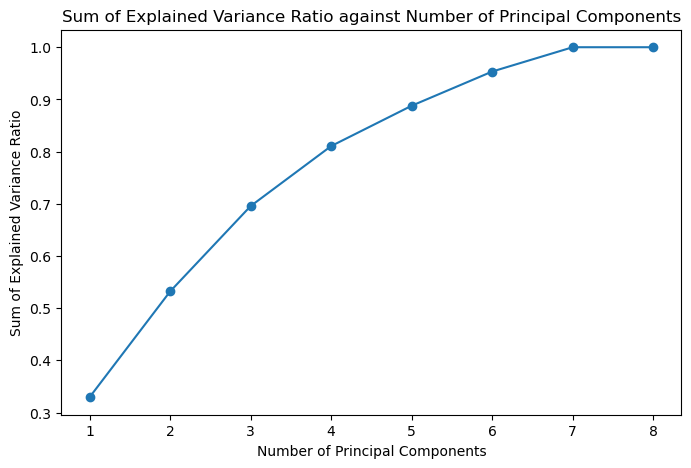

In [66]:
# plotting a graph of the number of components and the sum of explained variance ratio
plt.figure(figsize = (8, 5)) # setting the figure size
plt.plot(exp_var_df['Number_of_Components'], exp_var_df['Explained_Variance_Ratio'], marker = "o") # line plot
plt.xlabel("Number of Principal Components") # setting the x-axis label
plt.ylabel("Sum of Explained Variance Ratio") # setting the y-axis label
plt.title('Sum of Explained Variance Ratio against Number of Principal Components') # setting the title
plt.show() # displaying the plot

The graph above shows that the higher the number of Principal Components, the higher the explained variance ratio. This means that more components will better explain the data and reduces the amount of information lost.  

I would be choosing 3 Principal components which explain about 70% of the data, with 30% of the information lost.

#### Rebuilding the model using just 3 principal components

In [67]:
# declaring an instance of the model
lr3 = LinearRegression()

In [68]:
# training the model
lr3_model = train_model(lr3, x_train_pca, y_train2)

In [69]:
# checking the metrics on the training data
train_pca_metrics = compute_model_metrics(lr3_model, x_train_pca, y_train2)
train_pca_metrics

,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error,Mean_Absolute_Percentage_Error,R_squared,Adjusted_R_squared
0,160.215002,12.657606,10.526926,9.851999,0.515797,0.513993


In [70]:
# checking the metrics on the test data
test_pca_metrics = compute_model_metrics(lr3_model, x_test_pca, y_test2)
test_pca_metrics

,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error,Mean_Absolute_Percentage_Error,R_squared,Adjusted_R_squared
0,161.758607,12.718436,10.483108,9.689602,0.563884,0.557309


Comparing the performance of the model with the initial models, we can see a reduced coefficient of determination. This is expected for the following reason:

- PCA is ideally performed on high dimensional data and works by summarizing the important variables in the data while losing some information in the process. Applying PCA to our original data which is small will result in some information lost. The coefficient of determination which shows the percentage to which the independent variables explain the response variable would be reduced as a result of this.

## Task 3

**Investigate the relationship between age and heartrate  by means of age grouping.  
Provide graphical representation. (Hint: Calculate mean heartrate for each group).  
Explain your choice of age intervals.**

In [71]:
# age distribution
df['Age'].describe().T

count    1012.000000
mean       29.899209
std        13.473560
min        10.000000
25%        19.000000
50%        26.000000
75%        39.000000
max        70.000000
Name: Age, dtype: float64

Equal bands of 5 would be used for the age grouping starting from age 0 - 14 (avg. age of menarche). Ths grouping has been selected to ensure consistency and aid comparison across different domains.

In [72]:
# function to compute the age group. 

def compute_age_group(age):
    """Function to compute age groups
    Args:
        age: the age column values
    Returns: the age groups
    """
    
    if age <= 14:
        return '0 - 14'
    elif age <= 19:
        return '15 - 19'
    elif age <= 24:
        return '20 - 24'
    elif age <= 29:
        return '25 - 29'
    elif age <= 34:
        return '30 - 34'
    elif age <= 39:
        return '35 - 39'
    elif age <= 44:
        return '40 - 44'
    elif age <= 49:
        return '45 - 49'
    elif age <= 54:
        return '50 - 54'
    elif age <= 59:
        return '55 - 59'
    elif age >= 60:
        return '60+'

In [73]:
# applying the age group function
df['Age_Group'] = df['Age'].apply(compute_age_group)

In [74]:
# checking the dataframe
df.sample(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk,Age_Group
895,48,120,80,11.0,98.0,88,0,1,0,45 - 49
969,50,130,100,16.0,98.0,75,1,0,0,50 - 54
29,28,90,60,7.2,98.0,82,0,1,0,25 - 29
183,50,130,100,16.0,98.0,75,1,0,0,50 - 54
595,40,120,95,11.0,98.0,80,1,0,0,40 - 44


In [75]:
# getting the unique values for the age group
age_groups = ['0 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', 
              '50 - 54', '55 - 59', '60+']

# computing the mean HeartRate per age group using a list comprehension
mean_heart_rate = [df[df['Age_Group'] == i]['HeartRate'].mean() for i in age_groups] 

# creating a dataframe by pairing the age groups with the mean heart rate values
mean_heartrate_df = pd.DataFrame({"Age_Groups": age_groups, "Mean_Heart_Rate": mean_heart_rate})
mean_heartrate_df

,Age_Groups,Mean_Heart_Rate
0,0 - 14,70.203704
1,15 - 19,73.587444
2,20 - 24,73.636872
3,25 - 29,77.937500
4,30 - 34,74.509091
5,35 - 39,73.803030
6,40 - 44,74.913043
7,45 - 49,82.288889
8,50 - 54,71.428571
9,55 - 59,74.000000


- The dataframe above shows the computed Age Groups and the Mean Heart Rate

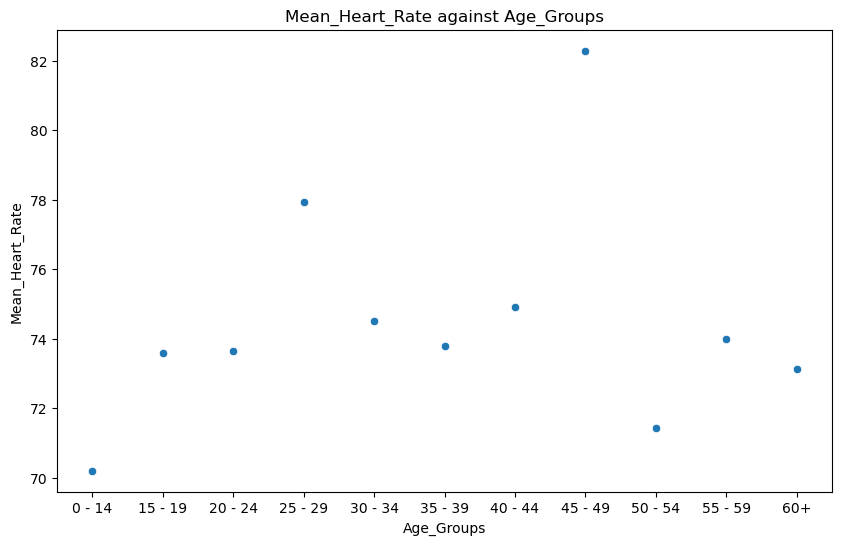

In [76]:
# scatterplot of heart rate against age
bivariate_plot(mean_heartrate_df, 'Age_Groups', 'Mean_Heart_Rate', sns.scatterplot, figsize=(10, 6))

- The above scatter plot shows that there is no correlation between mean heart rate and age groups.

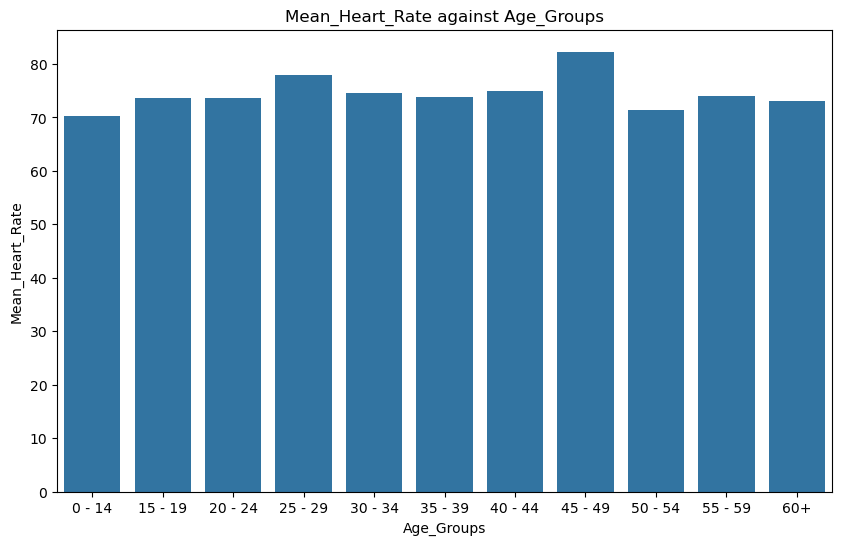

In [77]:
# distribution of heart rate against age

# colour is set to '#1F77B4' and figure size is set to '(10, 6)'
bivariate_plot(mean_heartrate_df, 'Age_Groups', 'Mean_Heart_Rate', sns.barplot, '#1F77B4', (10, 6))

- The graph above shows that the average heart rate across all age groups is between 70 - 82 which is normal for pregnant women.
- The highest average heart rate is in the 45 -49 age group, however, an almost balanced range can be seen across all age groups.
- This shows that Age has no correlation or effect on heart rate as a single variable. Other factors in addition to age could affect the heart rate of a pregnant woman.

## Task 4

**Blood pressure is recorded with 2 numbers: the systolic pressure and diastolic blood pressure. Assume, the high systolic blood pressure starts from 140, the high diastolic blood pressure starts from 90. The normal systolic pressure is in the range (110, 140). The normal diastolic blood pressure is in the range (70, 90). The low systolic pressure is lower than 110, and low diastolic is less than 70.**  

**Describe how would you investigate associations between pairs high/high, normal/normal, and low/low diastolic and systolic blood pressure.**  

**Calculate, and interpret the following:  
(1) Support  
(2) Confidence  
(3) Conviction  
(4) Lift**

#### Association Rules for Blood Pressure Pairs

In [78]:
# importing relevant libraries
from mlxtend.frequent_patterns import apriori, association_rules

In [79]:
# grouping the SystolicBP and Diastolic BP values into high, normal and low based on the ranges

def group_systBP(sysBP):
    """Function to label systolic BP values as high, normal, low
    Args:
        sysBP: the systolicBP column values
    Returns: the specified label
    """
    
    if sysBP >= 140:
        return "High Systolic"
    elif sysBP < 110:
        return "Low Systolic"
    else:
        return "Normal Systolic"
    
    
def group_diastBP(diastBP):
    """Function to label diastolic BP values as high, normal, low
    Args:
        diastBP: the diastolicBP column values
    Returns: the specified label
    """
    if diastBP >= 90: 
        return "High Diastolic"
    elif diastBP < 70:
        return "Low Diastolic"
    else:
        return "Normal Diastolic"

In [80]:
# applying the functions to the SystolicBP and DiastolicBP columns
df['Systolic_Groups'] = df['SystolicBP'].apply(group_systBP) # applying the systolic grouping

df['Diastolic_Groups'] = df['DiastolicBP'].apply(group_diastBP) # applying the diastolic grouping

In [81]:
# checking the dataframe
df.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk,Age_Group,Systolic_Groups,Diastolic_Groups
997,35,140,100,9.0,98.0,66,1,0,0,35 - 39,High Systolic,High Diastolic
692,24,120,80,7.5,98.0,66,0,1,0,20 - 24,Normal Systolic,Normal Diastolic
552,12,90,60,7.5,102.0,60,0,1,0,0 - 14,Low Systolic,Low Diastolic
305,22,100,65,6.9,98.0,80,0,1,0,20 - 24,Low Systolic,Low Diastolic
837,19,120,85,9.0,98.0,60,0,0,1,15 - 19,Normal Systolic,Normal Diastolic
533,25,140,100,7.5,98.0,80,1,0,0,25 - 29,High Systolic,High Diastolic
892,17,90,60,7.9,101.0,76,0,1,0,15 - 19,Low Systolic,Low Diastolic
391,32,120,90,7.8,98.0,70,0,1,0,30 - 34,Normal Systolic,High Diastolic
343,16,90,65,6.9,98.0,76,0,0,1,15 - 19,Low Systolic,Low Diastolic
941,60,120,80,7.5,98.0,75,0,1,0,60+,Normal Systolic,Normal Diastolic


In [82]:
# applying the get_dummies() function on the systolicBP and diastolicBP groups

groups_df = pd.DataFrame(df, columns=['Systolic_Groups', 'Diastolic_Groups']) # creating a separate dataframe

encoded_df = pd.get_dummies(groups_df) # encoding the dataframe
encoded_df

,Systolic_Groups_High Systolic,Systolic_Groups_Low Systolic,Systolic_Groups_Normal Systolic,Diastolic_Groups_High Diastolic,Diastolic_Groups_Low Diastolic,Diastolic_Groups_Normal Diastolic
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0
...,...,...,...,...,...,...
1009,0,0,1,0,1,0
1010,0,0,1,1,0,0
1011,0,1,0,0,1,0
1012,0,0,1,1,0,0


In [83]:
# generating frequent itemsets with minimum support of 0.1 to ensure all values are captured
freq_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)

# generating association rules with minimum confidence of 0.2 to ensure all values are captured
assoc_rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.2)

# calculating the support, confidence, conviction, and lift for each rule
assoc_rules['support'] = assoc_rules['support'].round(2) # computing the support
assoc_rules['confidence'] = assoc_rules['confidence'].round(2) # computing the confidence
assoc_rules['lift'] = assoc_rules['lift'].round(2) # computing the lift
assoc_rules['conviction'] = assoc_rules['conviction'].round(2) # computing the conviction

# displaying the association rules and evaluation metrics
assoc_rules

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Diastolic_Groups_High Diastolic),(Systolic_Groups_High Systolic),0.272727,0.128458,0.12,0.42,3.30,0.080579,1.51
1,(Systolic_Groups_High Systolic),(Diastolic_Groups_High Diastolic),0.128458,0.272727,0.12,0.90,3.30,0.080579,7.27
2,(Diastolic_Groups_Low Diastolic),(Systolic_Groups_Low Systolic),0.317194,0.339921,0.27,0.84,2.47,0.158978,4.15
3,(Systolic_Groups_Low Systolic),(Diastolic_Groups_Low Diastolic),0.339921,0.317194,0.27,0.78,2.47,0.158978,3.17
4,(Systolic_Groups_Normal Systolic),(Diastolic_Groups_High Diastolic),0.531621,0.272727,0.15,0.28,1.02,0.002246,1.01
5,(Diastolic_Groups_High Diastolic),(Systolic_Groups_Normal Systolic),0.272727,0.531621,0.15,0.54,1.02,0.002246,1.02
6,(Systolic_Groups_Normal Systolic),(Diastolic_Groups_Normal Diastolic),0.531621,0.410079,0.33,0.63,1.53,0.115986,1.59
7,(Diastolic_Groups_Normal Diastolic),(Systolic_Groups_Normal Systolic),0.410079,0.531621,0.33,0.81,1.53,0.115986,2.52


- The dataframe above shows the support, confidence, lift and conviction for the blood pressure pairs.

## Task 5

**Find clusters of patients with similar Systolic BP.**

In [84]:
# converting the systolicBP series to an array, and reshaping it to a 2D array
X_sysBP = np.array(df['SystolicBP']).reshape(-1, 1) 

scaler_sysBP = StandardScaler() # creating an instance of the StandardScaler class

X_sysBP_sc = scaler_sysBP.fit_transform(X_sysBP) # scaling the SystolicBP array

In [85]:
# the scaled SystolicBP array
X_sysBP_sc

array([[ 0.91334854],
       [ 1.45651638],
       [-1.25932284],
       ...,
       [-1.53090676],
       [ 0.37018069],
       [ 0.37018069]])

#### K-Means Clustering

In K-Means clustering, we have to choose an initial number of clusters to use for the grouping.  
The optimal number of clusters is the one that gives the least Sum of Squared Errors.  
The inertia calculates the Sum of Squared Errors (SSE) and measures how effectively the K-Means clustering method groups the data.

In [86]:
# importing relevant libraries to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans

In [87]:
# function to compute the inertia (Sum of Squared Errors)

def compute_inertia(data):
    """Function to compute inertia
    Args:
        data: the scaled data
    Returns:
        results_frame: a dataframe of the results
    """
    
    clusters = [i for i in range(1, 11)] # clusters list from 1 - 10
    inertia_scores = [] # creating an empty list to hold the inertia scores
    for i in clusters: # looping through the clusters
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0) # declaring an instance of the KMeans cluster
        kmeans.fit(data) # fitting the scaled data
        inertia_scores.append(kmeans.inertia_) # appending the scores to the inertia_scores list
    
    result_frame = pd.DataFrame({"Clusters": clusters, "Inertia": inertia_scores}) # creaating a dataframe
    return result_frame # returns the dataframe

In [88]:
result_df = compute_inertia(X_sysBP_sc) # applying the function
result_df

,Clusters,Inertia
0,1,1012.000000
1,2,226.241031
2,3,90.388252
3,4,55.131353
4,5,37.573173
5,6,21.318433
6,7,10.424969
7,8,5.092601
8,9,2.395270
9,10,1.613451


- We would be using the dataframe above to plot the elbow curve to determine the optimum number of clusters.

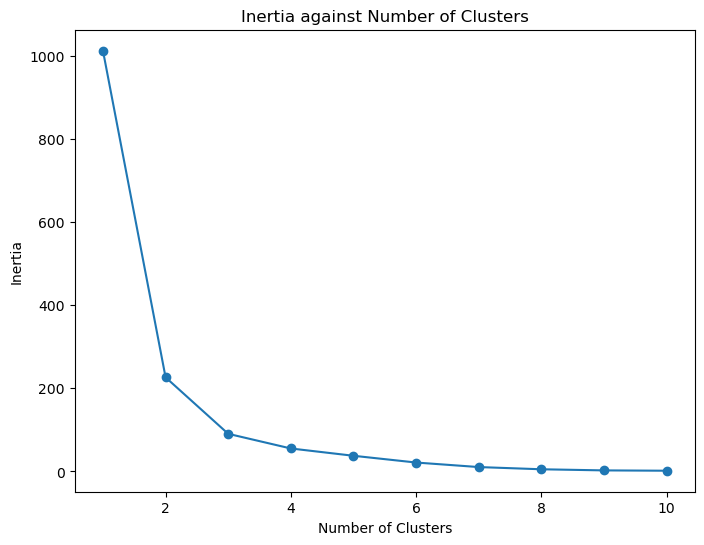

In [89]:
# plotting the elbow curve
plt.figure(figsize = (8, 6)) # setting the figure size
plt.plot(result_df["Clusters"], result_df["Inertia"], marker = "o") # creating the plot
plt.xlabel("Number of Clusters") # specifying the xlabel
plt.ylabel("Inertia") # specifying the ylabel
plt.title("Inertia against Number of Clusters") # specifying the title
plt.show() # showing the plot

- From the elbow curve above, the elbow point is 3 which is the point at which the rate of decrease in inertia slows down significantly.  
- I will rebuild the K-means clustering with 3 clusters

In [90]:
kmeans = KMeans(n_clusters=3, random_state=0) # creating an instance of the KMeans class
clusters = kmeans.fit_predict(X_sysBP_sc) # computing the clusters 
clusters # displaying the clusters

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, ..., 1, 2, 2], dtype=int32)

#### Plotting a graph of the clusters and SystolicBP

In [91]:
# adding the clusters to the dataframe
df['Clusters'] = clusters

In [92]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk,Age_Group,Systolic_Groups,Diastolic_Groups,Clusters
0,25,130,80,15.0,98.0,86,1,0,0,25 - 29,Normal Systolic,Normal Diastolic,0
1,35,140,90,13.0,98.0,70,1,0,0,35 - 39,High Systolic,High Diastolic,0
2,29,90,70,8.0,100.0,80,1,0,0,25 - 29,Low Systolic,Normal Diastolic,1
3,30,140,85,7.0,98.0,70,1,0,0,30 - 34,High Systolic,Normal Diastolic,0
4,35,120,60,6.1,98.0,76,0,1,0,35 - 39,Normal Systolic,Low Diastolic,2


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/palettes.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(name)


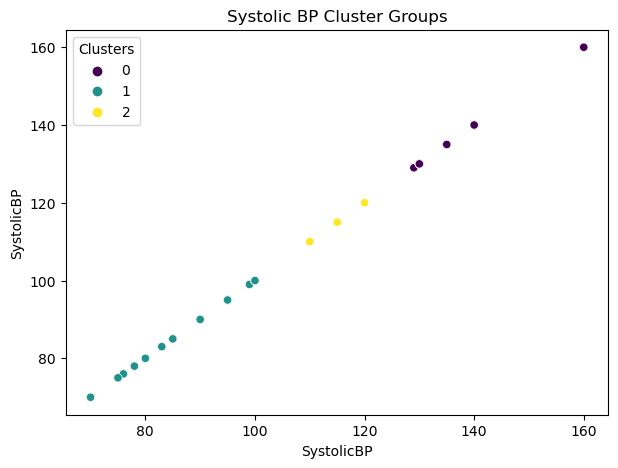

In [93]:
# plotting clusters against systolic BP
plt.figure(figsize = (7, 5)) # setting the figure size

# plotting the scatterplot
sns.scatterplot(x = df['SystolicBP'], y = df['SystolicBP'], hue = df['Clusters'], palette='viridis') 
plt.xlabel('SystolicBP') # setting the x-label
plt.ylabel('SystolicBP') # setting the y-label
plt.title('Systolic BP Cluster Groups') # setting the title name
plt.show() # displaying the plot

From the plot above, we can see that the algorithm grouped the patients into three distinct clusters

`Cluster 0`
- Minimum SystolicBP: 129
- Median SystolicBP: 140
- Maximum SystolicBP: 160  


`Cluster 1`
- Minimum SystolicBP: 70
- Median SystolicBP: 90
- Maximum SystolicBP: 100  


`Cluster 2`
- Minimum SystolicBP: 110
- Median SystolicBP: 120
- Maximum SystolicBP: 120  

#### Silhouette Score

- The silhouette score measures the similarity of data points to their clusters compared to surrounding clusters. 
- A higher score is ideal and shows that the clustering algorithm was effective

In [94]:
# importing the silhouette score
from sklearn.metrics import silhouette_score

In [95]:
# computing the silhouette score
kmeans_sil_score = silhouette_score(X_sysBP_sc, clusters)
kmeans_sil_score

0.8013183305009134

The silhouette score for the clusters is `0.8` which shows a high degree of similarity within the clusters and good separation between other clusters as scores closer to 1 indicate more distinct and well separated clusters.

## Task 6

**Calculate the correlation between Age and Systolic BP. Interpret your result.**

In [96]:
corr_matrix = df.corr() # creating the correlation matrix
age_sysbp_corr = corr_matrix.loc['Age', 'SystolicBP'] # computing the correlation between the age and systolicBP
age_sysbp_corr

/var/folders/2k/0kq3ns6d15zc29hhnqxvjj2m0000gp/T/ipykernel_10259/2553906411.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr() # creating the correlation matrix


0.4172921436670313

The correlation between age and systolic BP is `0.42`. This is a moderate positive linear relationship and it means that as age increases, systolic BP also increases.  

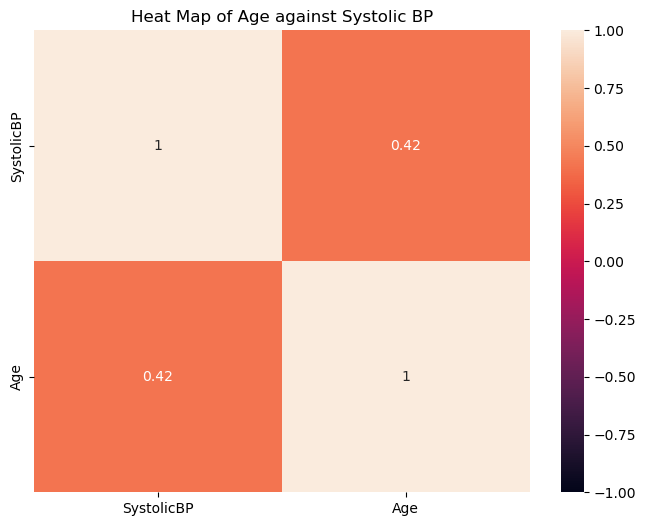

In [97]:
# plotting a heatmap
plt.figure(figsize = (8, 6)) # setting the figure size
sns.heatmap(data = df[['SystolicBP', 'Age']].corr(), vmax=1, vmin=-1, annot=True) # plotting the heatmap
plt.title('Heat Map of Age against Systolic BP') # setting the title
plt.show() # displaying the plot

- The heatmap above corroborates the computed correlation.

#### Regression Analysis

I am computing a regression analysis to further investigate the relationship between Age and Systolic BP.

In [98]:
!pip install statsmodels

In [99]:
# importing the statsmodel library
import statsmodels.api as sm

# generate some random data
x = df['Age']
y = df['SystolicBP']

# adding a constant to the x values
x = sm.add_constant(x)

# fit the regression model
model = sm.OLS(y, x).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     213.0
Date:                Fri, 12 May 2023   Prob (F-statistic):           6.56e-44
Time:                        09:32:21   Log-Likelihood:                -4287.0
No. Observations:                1012   AIC:                             8578.
Df Residuals:                    1010   BIC:                             8588.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.1280      1.282     74.987      0.0

- The regression analysis above computes a p-value of 6.56e-44 (6.56x10<sup>^-44</sup>) which is a very small value and hence rejects the null hypothesis which assumes by default that there is no relationship between the variables.

- This points to a strong evidence of a relationship between age and systolic BP which is does not occur by chance. 